In [1]:
import numpy as np
import pandas as pd

import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 6)

import random as rand

import re
from matplotlib import colors

# to show all columns
pd.set_option('display.max_columns', 40)

# Load dataset and get initial information

Data preparation

In [ ]:
df = pd.read_csv("carmax_data.csv")

print("The number of rows in the data is {}, and the number of columns in the data is {} ".
     format(df.shape[0], df.shape[1]))

# make dtypes of some variables 'category'

categoric_columns = ['make', 'model', 'trim_descrip', 'body', 'color', 
                     'make_appraisal', 'model_appraisal', 'trim_descrip_appraisal', 
                     'body_appraisal', 'color_appraisal']

for column in categoric_columns:
    df[column] = df[column].astype('category')

In [2]:
feature_names = df.columns
for i in range(len(feature_names)):
    print(str(i), '\t', str(feature_names[i]), '\t\t\t', str(type(df.iloc[0, i])))

0 	 price 			 <class 'str'>
1 	 appraisal_offer 			 <class 'str'>
2 	 online_appraisal_flag 			 <class 'numpy.float64'>
3 	 model_year 			 <class 'numpy.float64'>
4 	 mileage 			 <class 'str'>
5 	 make 			 <class 'str'>
6 	 model 			 <class 'str'>
7 	 trim_descrip 			 <class 'str'>
8 	 body 			 <class 'str'>
9 	 color 			 <class 'str'>
10 	 engine 			 <class 'str'>
11 	 cylinders 			 <class 'numpy.int64'>
12 	 mpg_city 			 <class 'numpy.float64'>
13 	 mpg_highway 			 <class 'numpy.float64'>
14 	 horsepower 			 <class 'numpy.int64'>
15 	 fuel_capacity 			 <class 'numpy.float64'>
16 	 model_year_appraisal 			 <class 'numpy.float64'>
17 	 mileage_appraisal 			 <class 'str'>
18 	 make_appraisal 			 <class 'str'>
19 	 model_appraisal 			 <class 'str'>
20 	 trim_descrip_appraisal 			 <class 'float'>
21 	 body_appraisal 			 <class 'str'>
22 	 color_appraisal 			 <class 'str'>
23 	 engine_appraisal 			 <class 'str'>
24 	 cylinders_appraisal 			 <class 'numpy.int64'>
25 	 mpg_city_appraisal 			

In [5]:
df.isna().sum()

price                          0
appraisal_offer                0
online_appraisal_flag       3834
model_year                     0
mileage                        0
make                           0
model                          0
trim_descrip               23841
body                       10259
color                         33
engine                         0
cylinders                      0
mpg_city                     590
mpg_highway                  590
horsepower                     0
fuel_capacity                  4
model_year_appraisal           0
mileage_appraisal              0
make_appraisal                 0
model_appraisal            21508
trim_descrip_appraisal     31080
body_appraisal                 0
color_appraisal             1318
engine_appraisal               0
cylinders_appraisal            0
mpg_city_appraisal             1
mpg_highway_appraisal          0
horsepower_appraisal           0
fuel_capacity_appraisal      312
market                         0
dtype: int

In [6]:
df['price'].unique()

array(['$20k to $25k', '$15k to $20k', '$30k to $35k', '$35k to $40k',
       '$45k to $50k', '$25k to $30k', '$40k to $45k', '$0 to $15k',
       '$55k to $60k', '$60k to $65k', '$65k to $70k', '$70k+',
       '$50k to $55k'], dtype=object)

In [7]:
df['appraisal_offer'].unique()

array(['$0k to $5k', '$35k to $40k', '$5k to $10k', '$15k to $20k',
       '$40k+', '$20k to $25k', '$10k to $15k', '$25k to $30k',
       '$30k to $35k'], dtype=object)

In [8]:
df['mileage_appraisal'].unique()

array(['200k+ miles', '0 to 10k miles', '10k to 20k miles',
       '100k to 110k miles', '20k to 30k miles', '160k to 170k miles',
       '30k to 40k miles', '80k to 90k miles', '60k to 70k miles',
       '110k to 120k miles', '70k to 80k miles', '90k to 100k miles',
       '190k to 200k miles', '150k to 160k miles', '140k to 150k miles',
       '120k to 130k miles', '40k to 50k miles', '130k to 140k miles',
       '170k to 180k miles', '50k to 60k miles', '180k to 190k miles'],
      dtype=object)

# Convert values of the columns and change dtypes

In [9]:
# make dtypes of some variables 'category'

categoric_columns = ['make', 'model', 'trim_descrip', 'body', 'color', 
                     'make_appraisal', 'model_appraisal', 'trim_descrip_appraisal', 
                     'body_appraisal', 'color_appraisal']

for column in categoric_columns:
    df[column] = df[column].astype('category')

In [10]:
def convert_5k_increments(initial_str):
    m = re.findall(r'\d+', initial_str)
    return (int(m[0]) + 5) * 1000 if len(m) == 1 else (int(m[0]) + int(m[1])) / 2 * 1000
    
def convert_10k_increments(initial_str):
    m = re.findall(r'\d+', initial_str)
    return (int(m[0]) + 10) * 1000 if len(m) == 1 else (int(m[0]) + int(m[1])) / 2 * 1000

In [11]:
df['price'] = df['price'].apply(convert_5k_increments)
df['mileage'] = df['mileage'].apply(convert_5k_increments)
df['engine'] = df['engine'].str.extract('([\d].[\d]+)').astype("float")

In [12]:
df['appraisal_offer'] = df['appraisal_offer'].apply(convert_5k_increments)
df['mileage_appraisal'] = df['mileage_appraisal'].apply(convert_10k_increments)
df['engine_appraisal'] = df['engine_appraisal'].str.extract('([\d].[\d]+)').astype("float")

In [13]:
df.head()

,price,appraisal_offer,online_appraisal_flag,model_year,mileage,make,model,trim_descrip,body,color,engine,cylinders,mpg_city,mpg_highway,horsepower,fuel_capacity,model_year_appraisal,mileage_appraisal,make_appraisal,model_appraisal,trim_descrip_appraisal,body_appraisal,color_appraisal,engine_appraisal,cylinders_appraisal,mpg_city_appraisal,mpg_highway_appraisal,horsepower_appraisal,fuel_capacity_appraisal,market
0,22500.0,2500.0,1.0,2014.0,17500.0,HDT,HDT_12,Premium,E,Red,2.0,4,27.0,33.0,152,16.0,2001.0,210000.0,AIH,AIH_32,NaN,D,Silver,4.0,6,17.0,21,236,21.0,13
1,17500.0,2500.0,0.0,2006.0,105000.0,KQZ,KQZ_23,Premium,E,Silver,3.5,6,19.0,27.0,285,18.0,1996.0,5000.0,KQZ,KQZ_3,Not Premium,D,Gold,4.2,6,16.0,21,205,25.0,11
2,32500.0,37500.0,1.0,2014.0,7500.0,CZV,CZV_10,Premium,E,Black,2.5,4,24.0,30.0,187,15.0,2014.0,15000.0,CIP,CIP_16,NaN,E,Red,2.0,4,41.0,38,181,10.0,13
3,37500.0,7500.0,1.0,2014.0,17500.0,IZA,IZA_19,Premium,F,Silver,2.0,4,25.0,34.0,255,15.0,2006.0,105000.0,IZA,NaN,Premium,F,Blue,3.0,6,17.0,25,230,16.0,13
4,32500.0,17500.0,1.0,2011.0,37500.0,HDT,HDT_8,Premium,F,Blue,2.5,4,17.0,23.0,305,15.0,2011.0,25000.0,LTX,LTX_20,Not Premium,E,Black,2.4,4,20.0,29,182,18.0,16


In [14]:
df['offer_40kplus'] = (df['appraisal_offer'] > 40000).astype(int)

In [15]:
df.head()

,price,appraisal_offer,online_appraisal_flag,model_year,mileage,make,model,trim_descrip,body,color,engine,cylinders,mpg_city,mpg_highway,horsepower,fuel_capacity,model_year_appraisal,mileage_appraisal,make_appraisal,model_appraisal,trim_descrip_appraisal,body_appraisal,color_appraisal,engine_appraisal,cylinders_appraisal,mpg_city_appraisal,mpg_highway_appraisal,horsepower_appraisal,fuel_capacity_appraisal,market,offer_40kplus
0,22500.0,2500.0,1.0,2014.0,17500.0,HDT,HDT_12,Premium,E,Red,2.0,4,27.0,33.0,152,16.0,2001.0,210000.0,AIH,AIH_32,NaN,D,Silver,4.0,6,17.0,21,236,21.0,13,0
1,17500.0,2500.0,0.0,2006.0,105000.0,KQZ,KQZ_23,Premium,E,Silver,3.5,6,19.0,27.0,285,18.0,1996.0,5000.0,KQZ,KQZ_3,Not Premium,D,Gold,4.2,6,16.0,21,205,25.0,11,0
2,32500.0,37500.0,1.0,2014.0,7500.0,CZV,CZV_10,Premium,E,Black,2.5,4,24.0,30.0,187,15.0,2014.0,15000.0,CIP,CIP_16,NaN,E,Red,2.0,4,41.0,38,181,10.0,13,0
3,37500.0,7500.0,1.0,2014.0,17500.0,IZA,IZA_19,Premium,F,Silver,2.0,4,25.0,34.0,255,15.0,2006.0,105000.0,IZA,NaN,Premium,F,Blue,3.0,6,17.0,25,230,16.0,13,0
4,32500.0,17500.0,1.0,2011.0,37500.0,HDT,HDT_8,Premium,F,Blue,2.5,4,17.0,23.0,305,15.0,2011.0,25000.0,LTX,LTX_20,Not Premium,E,Black,2.4,4,20.0,29,182,18.0,16,0


In [16]:
# df['color'].value_counts()

In [17]:
# # fill null values in 'color' and 'color_appraisal' with the most frequent value
# df['color'].fillna(df['color'].value_counts().index[0], inplace = True)
# df['color_appraisal'].fillna(df['color_appraisal'].value_counts().index[0], inplace = True)

In [18]:
# unique_colors = df['color'].unique()
# color_to_hex = {}

# color_to_hex['burgundy'] = '#8C001A'
# color_to_hex['pearl'] = '#FDEEF4'
# color_to_hex['unknown'] = '#000000'

# for c in unique_colors:
#     c = c.lower()
#     try:
#         color_to_hex[c] = colors.cnames[c]
#     except:
#         next

In [19]:
# df[['color_r', 'color_g', 'color_b']] = df['color'].apply(lambda x: color_to_hex[x.lower()]).apply(colors.to_rgb).tolist()

In [20]:
# df[['color_appraisal_r', 'color_appraisal_g', 'color_appraisal_b']] = df['color_appraisal'].apply(lambda x: color_to_hex[x.lower()]).apply(colors.to_rgb).tolist()



# Get additional information about the dataset

In [21]:
df.isna().sum()

price                          0
appraisal_offer                0
online_appraisal_flag       3834
model_year                     0
mileage                        0
make                           0
model                          0
trim_descrip               23841
body                       10259
color                         33
engine                         1
cylinders                      0
mpg_city                     590
mpg_highway                  590
horsepower                     0
fuel_capacity                  4
model_year_appraisal           0
mileage_appraisal              0
make_appraisal                 0
model_appraisal            21508
trim_descrip_appraisal     31080
body_appraisal                 0
color_appraisal             1318
engine_appraisal               0
cylinders_appraisal            0
mpg_city_appraisal             1
mpg_highway_appraisal          0
horsepower_appraisal           0
fuel_capacity_appraisal      312
market                         0
offer_40kp

In [22]:
df.describe(include = 'category').T

,count,unique,top,freq
make,200000,37,AIH,26201
model,200000,575,HXQ_8,5528
trim_descrip,176159,2,Not Premium,97920
body,189741,6,E,106730
color,199967,16,White,45198
make_appraisal,200000,38,KQZ,21886
model_appraisal,178492,675,HXQ_14,4845
trim_descrip_appraisal,168920,2,Not Premium,111567
body_appraisal,200000,8,E,77597
color_appraisal,198682,16,Black,41534


<Figure size 720x360 with 0 Axes>

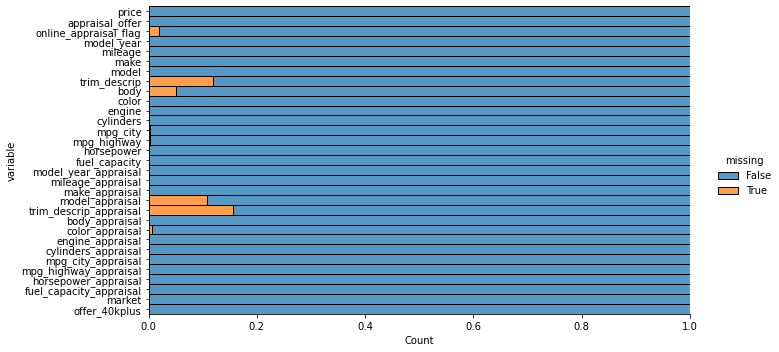

In [23]:
plt.figure(figsize = (10, 5))
sns.displot(
    data = df.isna().melt(value_name = 'missing'),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    aspect = 2
)

In [24]:
df = df.drop(columns = ['model', 'model_appraisal', 'color', 'color_appraisal'])

In [25]:
# fill null values with median (numeric) and frequent values (categoric)
numeric_data = [c for c in df.select_dtypes(['int', 'float'])]
categoric_data = [c for c in df.select_dtypes(exclude = ['int', 'float'])]

for col in numeric_data:
    df[col].fillna(df[col].median(), inplace = True)
    
for col in categoric_data:
    df[col].fillna(df[col].value_counts().index[0], inplace = True)

In [26]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(3)

<ipython-input-26-9517c8ba798e>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.corr().style.background_gradient(cmap='coolwarm').set_precision(3)


,price,appraisal_offer,online_appraisal_flag,model_year,mileage,engine,cylinders,mpg_city,mpg_highway,horsepower,fuel_capacity,model_year_appraisal,mileage_appraisal,engine_appraisal,cylinders_appraisal,mpg_city_appraisal,mpg_highway_appraisal,horsepower_appraisal,fuel_capacity_appraisal,market,offer_40kplus
price,1.000,0.390,0.037,0.471,-0.403,0.552,0.535,-0.463,-0.545,0.678,0.559,0.284,-0.246,0.232,0.217,-0.182,-0.203,0.350,0.239,0.005,0.154
appraisal_offer,0.390,1.000,0.175,0.181,-0.132,0.210,0.210,-0.174,-0.199,0.278,0.206,0.723,-0.737,0.178,0.154,-0.091,-0.124,0.415,0.168,0.001,0.442
online_appraisal_flag,0.037,0.175,1.000,0.026,-0.001,0.008,0.011,-0.009,-0.012,0.019,0.007,0.172,-0.167,-0.027,-0.031,0.033,0.034,0.025,-0.025,-0.001,0.023
model_year,0.471,0.181,0.026,1.000,-0.679,-0.057,-0.055,0.091,0.040,0.026,-0.053,0.216,-0.178,-0.002,-0.013,0.011,0.018,0.067,0.010,-0.017,0.060
mileage,-0.403,-0.132,-0.001,-0.679,1.000,0.087,0.087,-0.089,-0.055,0.006,0.107,-0.150,0.168,0.015,0.019,-0.016,-0.024,-0.043,0.012,0.008,-0.050
engine,0.552,0.210,0.008,-0.057,0.087,1.000,0.896,-0.696,-0.696,0.861,0.788,0.116,-0.089,0.285,0.266,-0.221,-0.236,0.311,0.271,-0.004,0.069
cylinders,0.535,0.210,0.011,-0.055,0.087,0.896,1.000,-0.656,-0.665,0.833,0.738,0.117,-0.092,0.271,0.257,-0.213,-0.229,0.303,0.261,-0.001,0.069
mpg_city,-0.463,-0.174,-0.009,0.091,-0.089,-0.696,-0.656,1.000,0.914,-0.743,-0.714,-0.117,0.094,-0.218,-0.203,0.224,0.225,-0.258,-0.222,0.016,-0.047
mpg_highway,-0.545,-0.199,-0.012,0.040,-0.055,-0.696,-0.665,0.914,1.000,-0.732,-0.741,-0.133,0.113,-0.224,-0.208,0.220,0.243,-0.264,-0.232,0.013,-0.054
horsepower,0.678,0.278,0.019,0.026,0.006,0.861,0.833,-0.743,-0.732,1.000,0.764,0.182,-0.152,0.286,0.270,-0.234,-0.241,0.362,0.278,0.002,0.093


In [27]:
df.columns

Index(['price', 'appraisal_offer', 'online_appraisal_flag', 'model_year',
       'mileage', 'make', 'trim_descrip', 'body', 'engine', 'cylinders',
       'mpg_city', 'mpg_highway', 'horsepower', 'fuel_capacity',
       'model_year_appraisal', 'mileage_appraisal', 'make_appraisal',
       'trim_descrip_appraisal', 'body_appraisal', 'engine_appraisal',
       'cylinders_appraisal', 'mpg_city_appraisal', 'mpg_highway_appraisal',
       'horsepower_appraisal', 'fuel_capacity_appraisal', 'market',
       'offer_40kplus'],
      dtype='object')

# Visualizations and EDA

In [28]:
appraisal_columns = ['price', 'appraisal_offer', 'online_appraisal_flag', 'model_year_appraisal', 
                     'mileage_appraisal', 'make_appraisal','trim_descrip_appraisal', 'body_appraisal',
                     'engine_appraisal', 'cylinders_appraisal', 'mpg_city_appraisal','mpg_highway_appraisal', 
                     'horsepower_appraisal','fuel_capacity_appraisal', 'market', 'offer_40kplus']

appraisal = df[appraisal_columns]

In [29]:
appraisal.head()

,price,appraisal_offer,online_appraisal_flag,model_year_appraisal,mileage_appraisal,make_appraisal,trim_descrip_appraisal,body_appraisal,engine_appraisal,cylinders_appraisal,mpg_city_appraisal,mpg_highway_appraisal,horsepower_appraisal,fuel_capacity_appraisal,market,offer_40kplus
0,22500.0,2500.0,1.0,2001.0,210000.0,AIH,Not Premium,D,4.0,6,17.0,21,236,21.0,13,0
1,17500.0,2500.0,0.0,1996.0,5000.0,KQZ,Not Premium,D,4.2,6,16.0,21,205,25.0,11,0
2,32500.0,37500.0,1.0,2014.0,15000.0,CIP,Not Premium,E,2.0,4,41.0,38,181,10.0,13,0
3,37500.0,7500.0,1.0,2006.0,105000.0,IZA,Premium,F,3.0,6,17.0,25,230,16.0,13,0
4,32500.0,17500.0,1.0,2011.0,25000.0,LTX,Not Premium,E,2.4,4,20.0,29,182,18.0,16,0


In [30]:
appraisal.corr().style.background_gradient(cmap='coolwarm').set_precision(3)

<ipython-input-30-78150b25465e>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  appraisal.corr().style.background_gradient(cmap='coolwarm').set_precision(3)


,price,appraisal_offer,online_appraisal_flag,model_year_appraisal,mileage_appraisal,engine_appraisal,cylinders_appraisal,mpg_city_appraisal,mpg_highway_appraisal,horsepower_appraisal,fuel_capacity_appraisal,market,offer_40kplus
price,1.000,0.390,0.037,0.284,-0.246,0.232,0.217,-0.182,-0.203,0.350,0.239,0.005,0.154
appraisal_offer,0.390,1.000,0.175,0.723,-0.737,0.178,0.154,-0.091,-0.124,0.415,0.168,0.001,0.442
online_appraisal_flag,0.037,0.175,1.000,0.172,-0.167,-0.027,-0.031,0.033,0.034,0.025,-0.025,-0.001,0.023
model_year_appraisal,0.284,0.723,0.172,1.000,-0.741,-0.175,-0.205,0.192,0.236,0.105,-0.142,-0.018,0.181
mileage_appraisal,-0.246,-0.737,-0.167,-0.741,1.000,0.151,0.158,-0.160,-0.183,-0.069,0.161,-0.012,-0.190
engine_appraisal,0.232,0.178,-0.027,-0.175,0.151,1.000,0.938,-0.733,-0.769,0.839,0.809,-0.003,0.173
cylinders_appraisal,0.217,0.154,-0.031,-0.205,0.158,0.938,1.000,-0.699,-0.745,0.823,0.761,0.001,0.162
mpg_city_appraisal,-0.182,-0.091,0.033,0.192,-0.160,-0.733,-0.699,1.000,0.906,-0.705,-0.719,0.013,-0.104
mpg_highway_appraisal,-0.203,-0.124,0.034,0.236,-0.183,-0.769,-0.745,0.906,1.000,-0.696,-0.755,0.007,-0.130
horsepower_appraisal,0.350,0.415,0.025,0.105,-0.069,0.839,0.823,-0.705,-0.696,1.000,0.727,-0.004,0.244


In [31]:
appraisal['appraisal_offer'].unique()

array([ 2500., 37500.,  7500., 17500., 45000., 22500., 12500., 27500.,
       32500.])

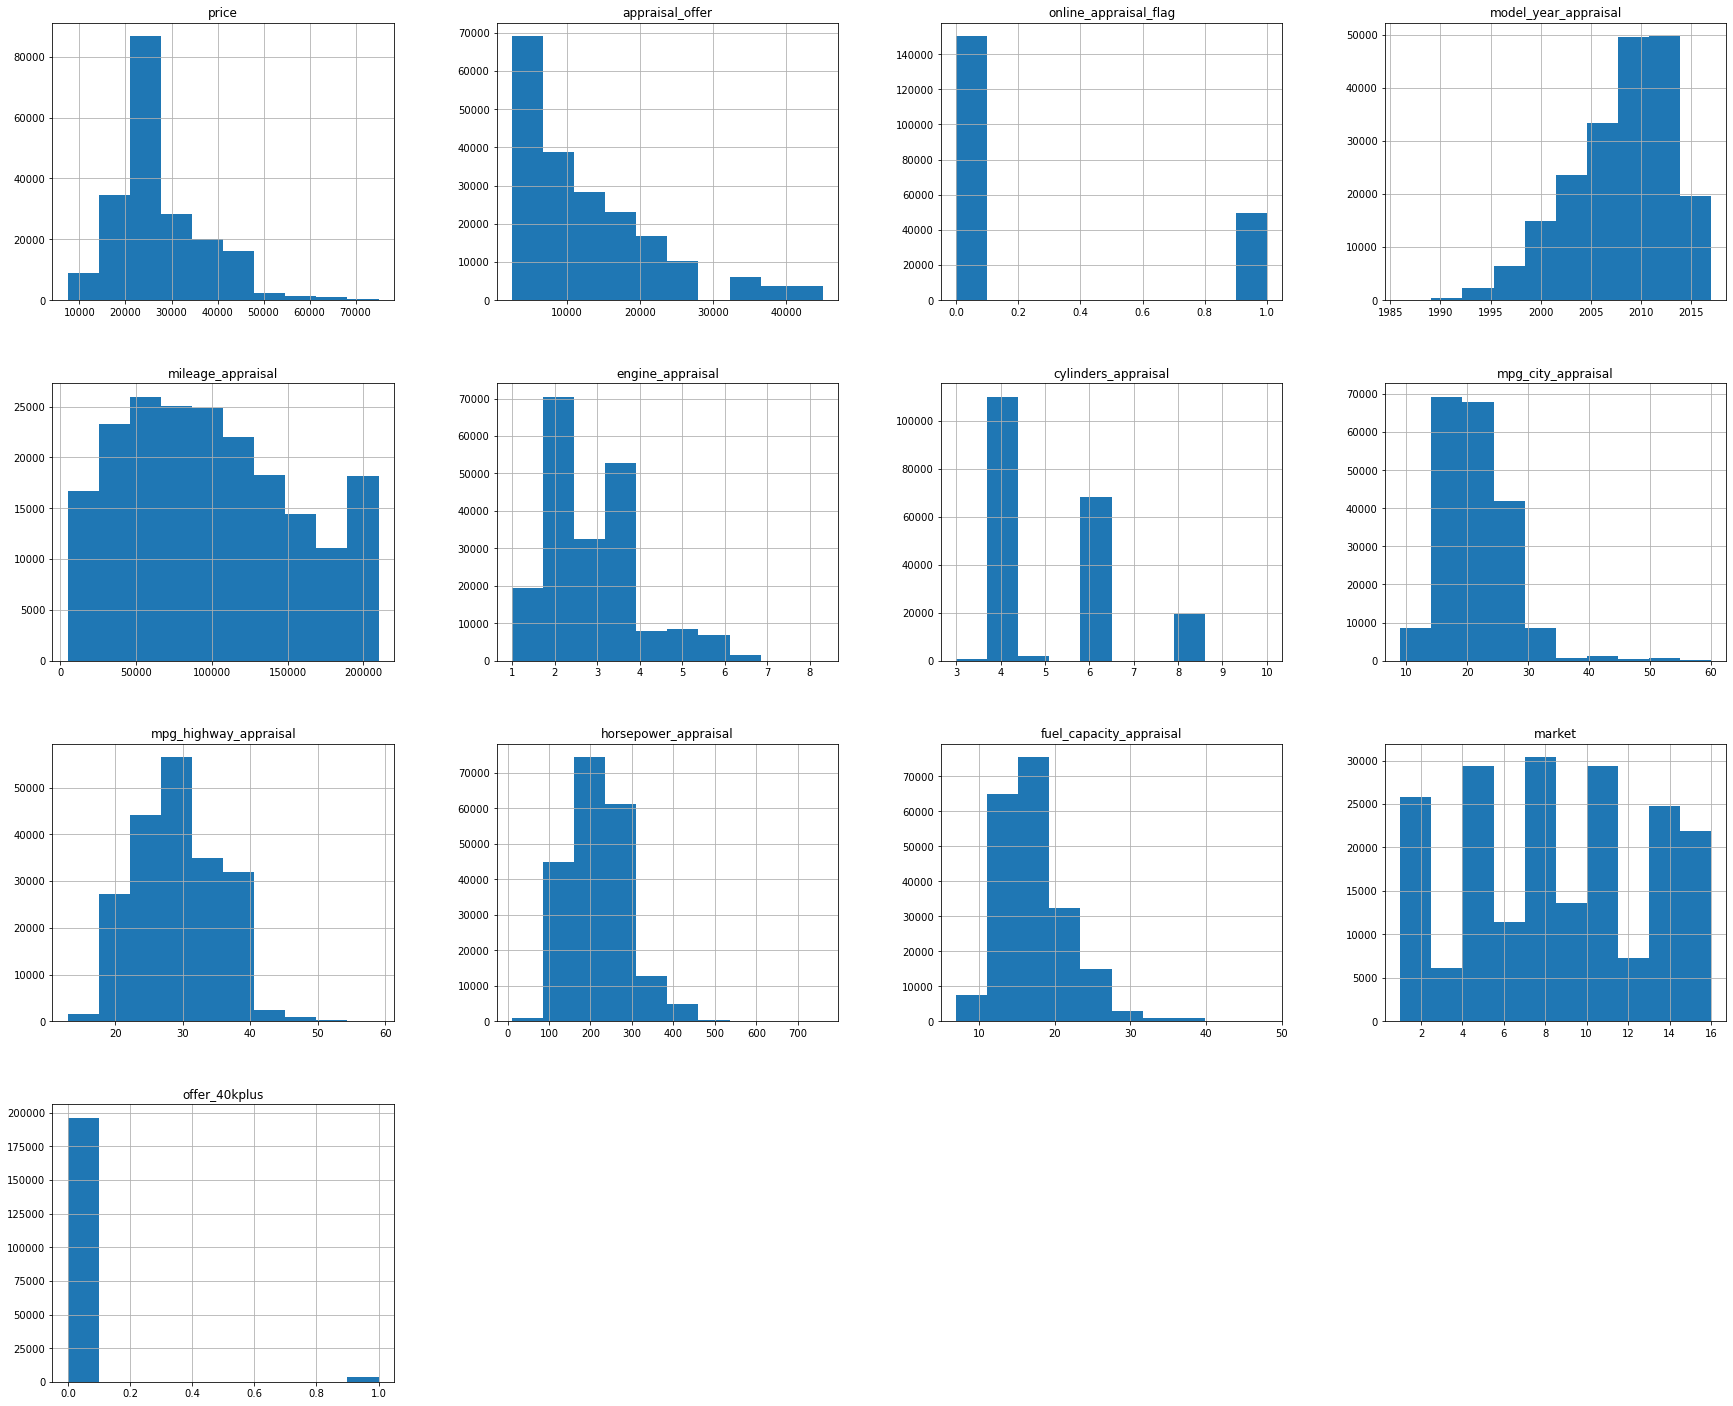

In [32]:
appraisal.hist(figsize = (30, 25), legend = False)
plt.show()

Text(0.5, 0.98, 'Price destribution')

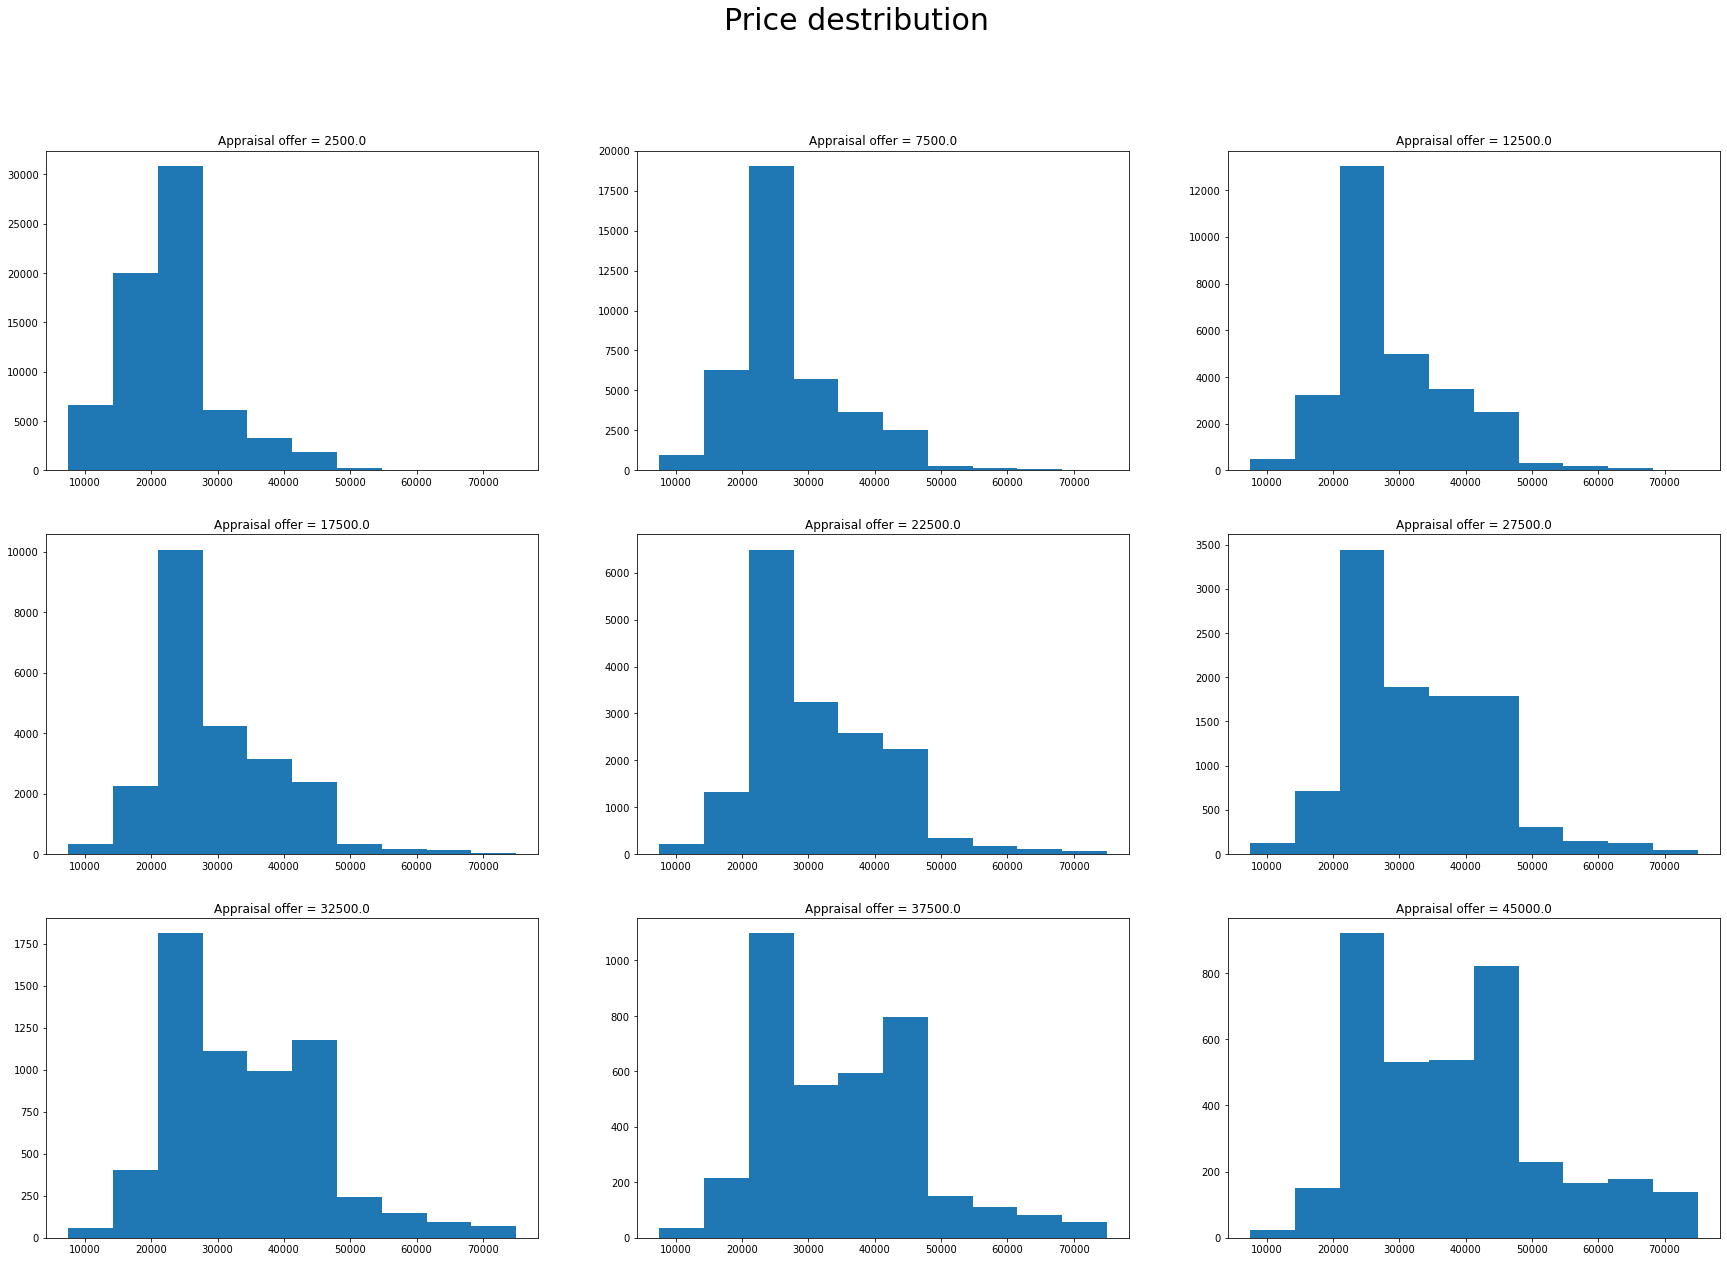

In [33]:
app_offers = sorted(appraisal['appraisal_offer'].unique())

fig, axes = plt.subplots(3,3, figsize = (30, 20))
axes = axes.flatten()

for i in range(len(app_offers)):
    axes[i].hist(appraisal[appraisal['appraisal_offer'] == app_offers[i]]['price'])
    axes[i].title.set_text("Appraisal offer = " + str(app_offers[i]))
    
fig.suptitle("Price destribution", fontsize = 30)

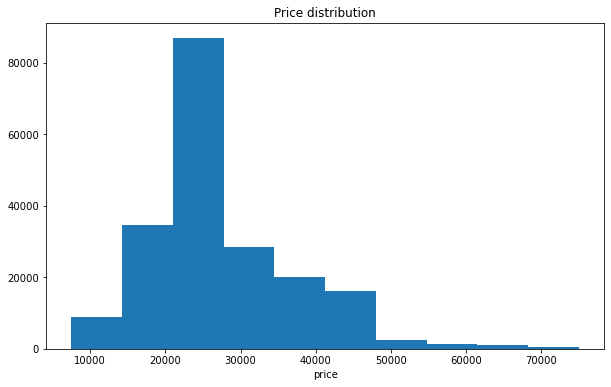

In [34]:
plt.title("Price distribution")
plt.hist(appraisal['price'])
plt.xlabel("price")
plt.show()

# Split and encode the dataset

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score
from sklearn import model_selection
from sklearn.pipeline import make_pipeline

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

/opt/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:366: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/opt/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:366: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/opt/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:366: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


In [36]:
y = appraisal['price']

In [37]:
x = appraisal.drop('price', axis = 1)

In [38]:
x = pd.get_dummies(x, drop_first = True)

In [39]:
y.shape, x.shape

((200000,), (200000, 57))

In [40]:
rob_scaler = RobustScaler()
rob_scaler.fit(x)
x = rob_scaler.transform(x)

In [41]:
# split the dataset into train/test

# X_train, X_test, y_train, y_test = train_test_split(x, y, 
#                                                     test_size = 0.20,
#                                                     shuffle = True,
#                                                     random_state = 1)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold


In [43]:
y = np.log(y)

# Linear Models

Linear Regression

In [71]:
from sklearn.linear_model import LinearRegression
scores = []
linear_model = LinearRegression()
cv = KFold(n_splits = 5, random_state = 0, shuffle = True)
for train_idx, test_idx in cv.split(x):
    X_train, X_test, y_train, y_test = x[train_idx], x[test_idx], y[train_idx], y[test_idx]
    linear_model.fit(X_train, y_train)
    linear_pred = linear_model.predict(X_test)
    linear_RMSE = np.sqrt(mean_squared_error(linear_pred, y_test))
    scores.append(linear_RMSE)
linear_score = np.mean(scores)

In [72]:
linear_score

0.355980689894602

In [97]:
linear_score

0.3559696334412655

Lasso Regression

In [130]:
from sklearn.linear_model import Lasso
lasso_scores = np.zeros(50)
lamda = list(np.linspace(1e-10, 1e-2, 50))
for i in range(50):
    scores = []
    lasso_model = Lasso(alpha = lamda[i])
    cv = KFold(n_splits = 10, random_state = 0, shuffle = True)
    for train_idx, test_idx in cv.split(x):
        X_train, X_test, y_train, y_test = x[train_idx], x[test_idx], y[train_idx], y[test_idx]
        lasso_model.fit(X_train, y_train)
        lasso_pred = lasso_model.predict(X_test)
        lasso_RMSE = np.sqrt(mean_squared_error(lasso_pred, y_test))
        scores.append(lasso_RMSE)
    lasso_score = np.mean(scores)
    lasso_scores[i] = lasso_score

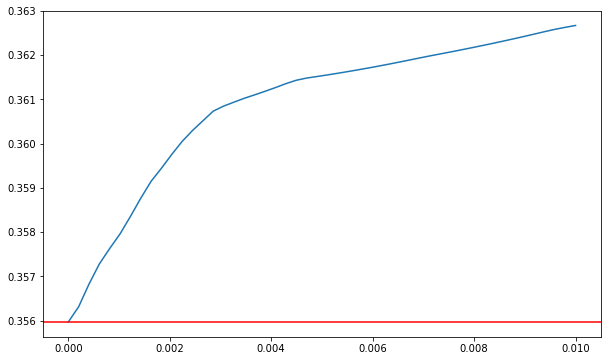

In [131]:
plt.plot(lamda, lasso_scores)
plt.axhline(linear_score, color = 'r', linestyle = '-')

In [132]:
from sklearn.linear_model import Ridge

ridge_scores = np.zeros(100)
lamda = list(np.linspace(0.001,20,100))
for i in range(len(ridge_scores)):
    scores = []
    ridge_model = Ridge(alpha = lamda[i])
    cv = KFold(n_splits = 10, random_state = 0, shuffle=True)
    for train_index, test_index in cv.split(x):
        X_train, X_test, y_train, y_test = x[train_index], x[test_index], y[train_index], y[test_index]
        ridge_model.fit(X_train, y_train)
        ridge_pred = ridge_model.predict(X_test)
        ridge_RMSE = np.sqrt(mean_squared_error(ridge_pred,y_test))
        scores.append(ridge_RMSE)
    ridge_score = np.mean(scores)
    ridge_scores[i] = ridge_score

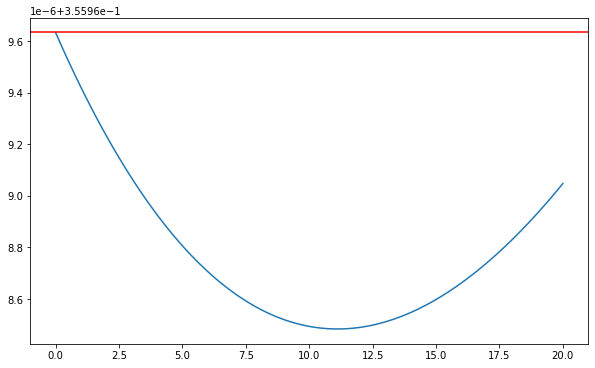

In [133]:
plt.plot(lamda, ridge_scores)
plt.axhline(linear_score, color = 'r', linestyle = '-')

# Predicting with tree-based models

Optimize a baseline Decision Tree model

In [85]:
from sklearn.tree import DecisionTreeRegressor
n_fold = 5
k_fold = KFold(n_splits = n_fold, random_state = 0, shuffle = True)

d = np.arange(5, 15, 1)
s = np.arange(5, 15, 1)
r = np.zeros((len(d), len(s)))

In [143]:
dt_params={
    "criterion":"squared_error",
    "max_depth":15,
    "min_samples_split":5
}

In [80]:
dt_scores = []
for train_idx, test_idx in k_fold.split(x):
    X_train, X_test, y_train, y_test = x[train_idx], x[test_idx], y[train_idx], y[test_idx]
    
    dt = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 10, min_samples_split = 4)
    dt.fit(X_train, y_train)
    
    dt_pred = dt.predict(X_test)
    dt_RMSE = np.sqrt(mean_squared_error(dt_pred, y_test))
    dt_scores.append(dt_RMSE)
    
    print('still going...')
    
print("totally finished")

dt_score = np.mean(dt_scores)

still going...
still going...
still going...
still going...
still going...
totally finished


In [81]:
dt_score

0.3571967380175596

In [86]:
for i in range(len(d)):
    for j in range(len(s)):
        dt_paras={
            "criterion":"squared_error",
            "max_depth":d[i],
            "min_samples_split":s[j]
        }
        
        dt_scores = []
        
        for train_index, test_index in k_fold.split(x):
            X_train, X_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]

            dt = DecisionTreeRegressor(**dt_paras)
            dt.fit(X_train,y_train)
            
            dt_pred = dt.predict(X_test)
            dt_RMSE = np.sqrt(mean_squared_error(dt_pred, y_test))
            dt_scores.append(dt_RMSE)

        r[i, j] = np.mean(dt_scores)
        print("d = {}, s = {}, error = {}".format(d[i], s[j], r[i, j]))

d = 5, s = 5, error = 0.3575108439597293
d = 5, s = 6, error = 0.3575108439597292
d = 5, s = 7, error = 0.35751084395972943
d = 5, s = 8, error = 0.3575108439597294
d = 5, s = 9, error = 0.3575108439597294
d = 5, s = 10, error = 0.3575108439597294
d = 5, s = 11, error = 0.3575108439597293
d = 5, s = 12, error = 0.35751084395972926
d = 5, s = 13, error = 0.3575108439597294
d = 5, s = 14, error = 0.3575108439597295
d = 6, s = 5, error = 0.35648421926272883
d = 6, s = 6, error = 0.3564842192627288
d = 6, s = 7, error = 0.3564842192627289
d = 6, s = 8, error = 0.35648421926272883
d = 6, s = 9, error = 0.3564842192627289
d = 6, s = 10, error = 0.35648421926272883
d = 6, s = 11, error = 0.356484219262729
d = 6, s = 12, error = 0.3564842192627289
d = 6, s = 13, error = 0.3564842192627288
d = 6, s = 14, error = 0.3564842192627287
d = 7, s = 5, error = 0.3558938221552462
d = 7, s = 6, error = 0.35589947748618306
d = 7, s = 7, error = 0.35589509065973635
d = 7, s = 8, error = 0.35589509065973635

In [95]:
np.argmin(r)

39

In [97]:
np.min(r)

0.35562545708591237

In [103]:
r[3][-1]

0.35562545708591237

In [104]:
print("d = 8, s = 14")

d = 8, s = 14


In [105]:
k_fold = KFold(n_splits = 10, random_state = 11, shuffle = True)

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.20,
                                                    shuffle = True,
                                                    random_state = 1)

In [108]:
def cv_rmse(model, X = x_train):
    rmse = np.sqrt(-cross_val_score(model, x_train, y_train, scoring = "neg_mean_squared_error", cv = k_fold))
    return rmse

def rmsle(y, y_pred):
    rmsle = np.sqrt(mean_squared_log_error(y, y_pred, squared = False))
    return rmsle

In [109]:
from mlxtend.regressor import StackingCVRegressor

In [110]:
xgb = XGBRegressor(n_estimators = 1000, random_state = 1)
lgbm = LGBMRegressor(n_estimators = 1000, random_state = 1)
gbr = GradientBoostingRegressor(n_estimators = 1000, random_state = 11)
rf = RandomForestRegressor(n_estimators = 1000, random_state = 1)
svr = SVR(C = 20)
lasso = LassoCV(alphas = [1e-10, 1e-8, 1e-7, 1e-5, 1e-2, 9e-4, 9e-3,
                                                        5e-4, 3e-4, 1e-4, 1e-3, 1e-2, 0.1,
                                                        0.3, 0.6, 1, 3, 5, 7, 14, 18, 25, 30,
                                                        45, 50, 70, 90], n_jobs = -1, cv = k_fold)

stacked = StackingCVRegressor(regressors = (xgb, lgbm, svr, lasso, gbr, rf),
                              meta_regressor = xgb, use_features_in_secondary = True)

In [ ]:
# fit the stacked model

stacked_model = stacked.fit(np.array(x_train), np.array(y_train))

In [ ]:
plt.hist(appraisal['appraisal_offer'], appraisal)